In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os   

In [ ]:
results_folder = "../results"



## T2T and HG38 kmers load

In [38]:
t2t_75_hist = pd.read_table('T2T_k75_hist.txt', header=None, index_col=0, names=['T2T_k=75'])

In [39]:
t2t_75_hist = pd.read_table('T2T_k75_hist.txt', header=None, index_col=0, names=['T2T_k=75'])

In [48]:
kmer_hist_all = pd.DataFrame()
path = os.path.join(results_folder, '*hist.txt')
for hist_path in glob.glob(path):
    hist_tmp = pd.read_table(hist_path, header=None, index_col=0, names=[hist_path[:-9]])
    kmer_hist_all = pd.concat([kmer_hist_all, hist_tmp], axis=1)
    
kmer_hist_all = kmer_hist_all.loc[:500]

All

Text(0.5, 1.0, '')

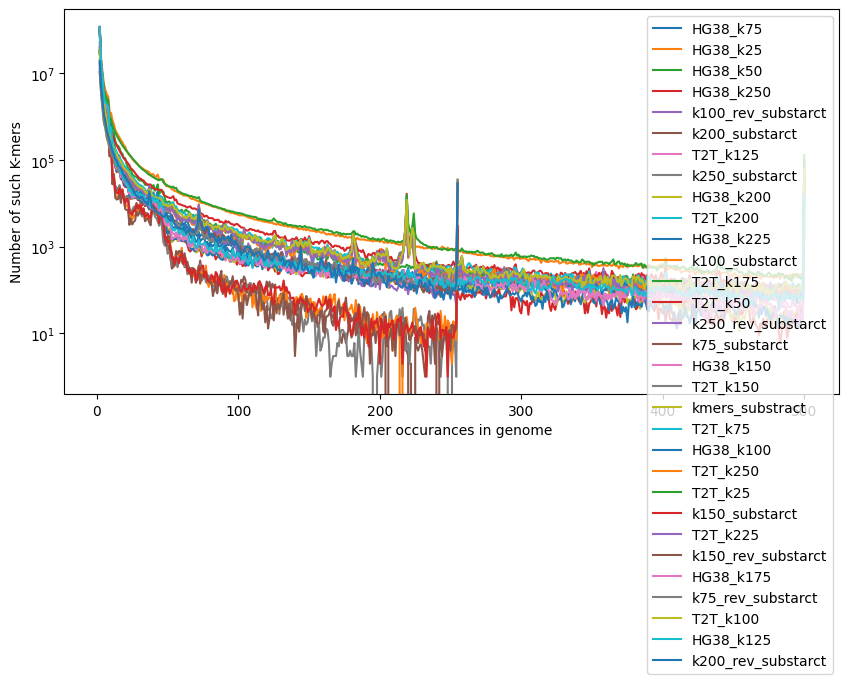

In [49]:
kmer_hist_all.plot(logy=True, figsize=(10, 5))
plt.xlabel('K-mer occurances in genome')
plt.ylabel('Number of such K-mers')
plt.title('')

## With substract by k

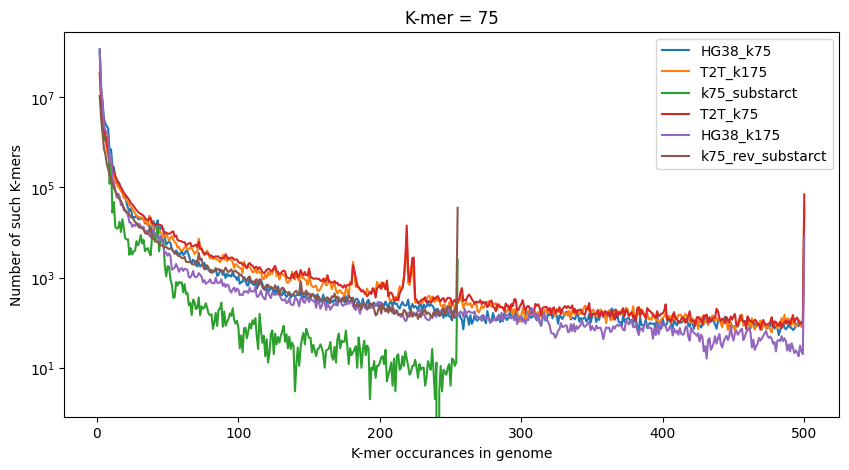

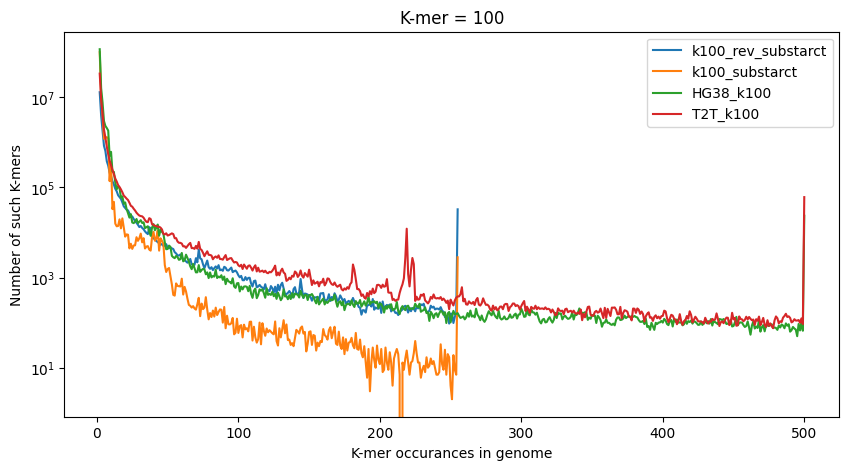

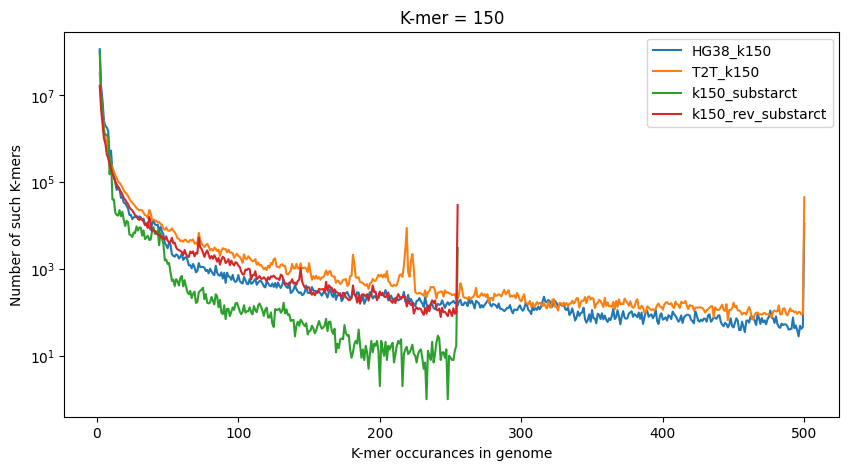

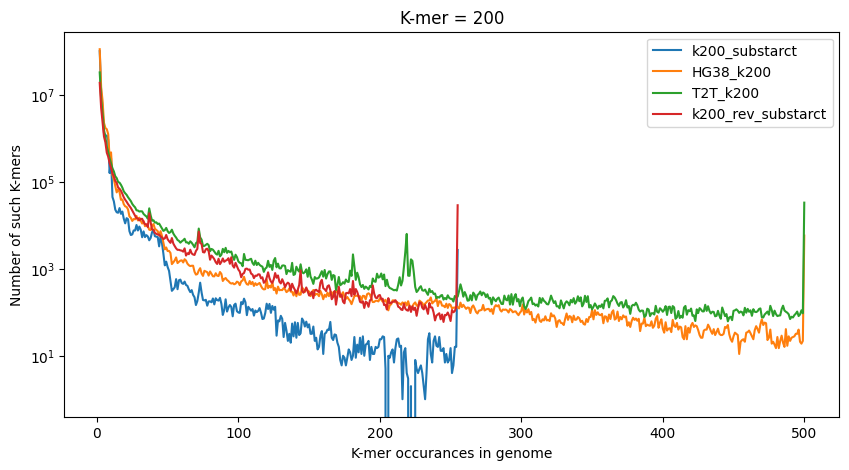

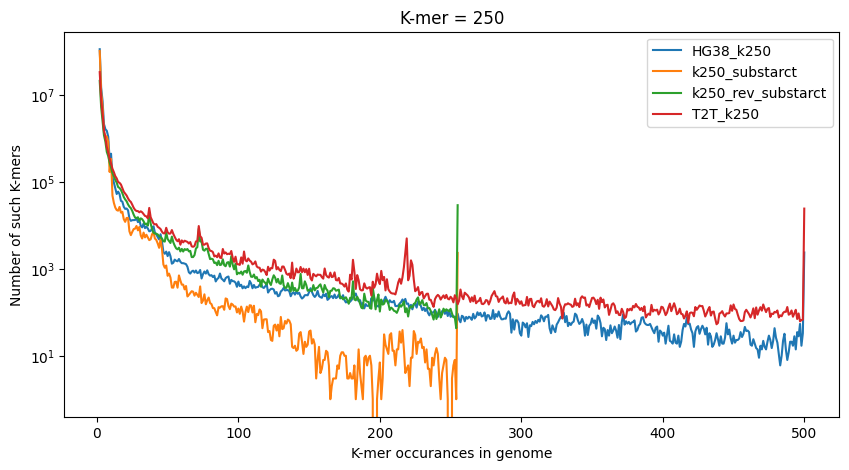

In [50]:
for k in ['75', '100', '150', '200', '250']:
    k_cols = [x for x in kmer_hist_all.columns if k in x]
    kmer_hist_all[k_cols].plot(logy=True, figsize=(10, 5))
    plt.xlabel('K-mer occurances in genome')
    plt.ylabel('Number of such K-mers')
    plt.title(f'K-mer = {k}')

## by genome

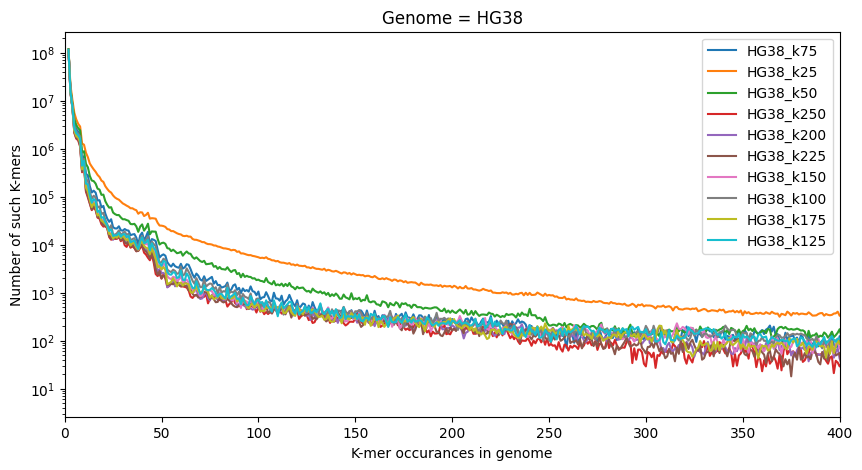

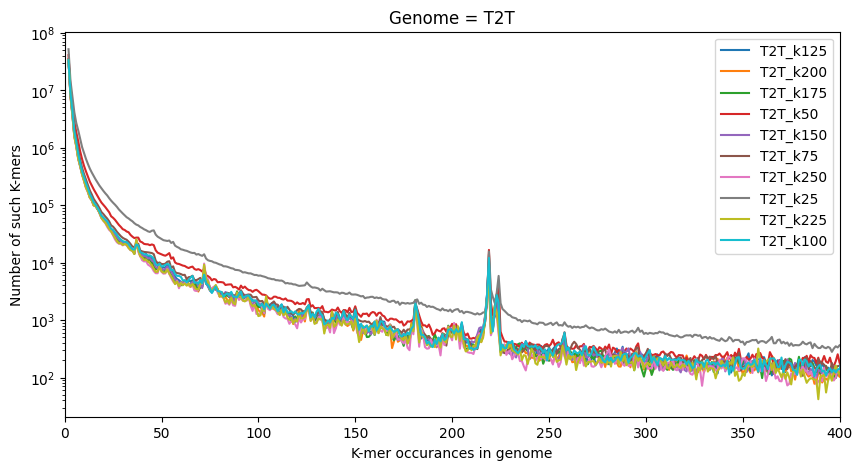

In [97]:
for genome in ['HG38', 'T2T']:
    genome_cols = [x for x in kmer_hist_all.columns if genome in x]
    kmer_hist_all[genome_cols].plot(logy=True, figsize=(10, 5))
    plt.xlabel('K-mer occurances in genome')
    plt.ylabel('Number of such K-mers')
    plt.title(f'Genome = {genome}')
    plt.xlim(0, 400)

## Only genomes k-mers by k

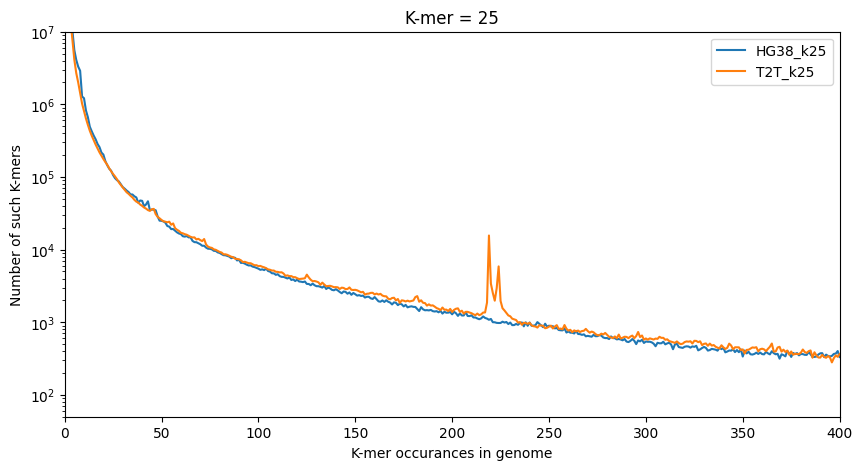

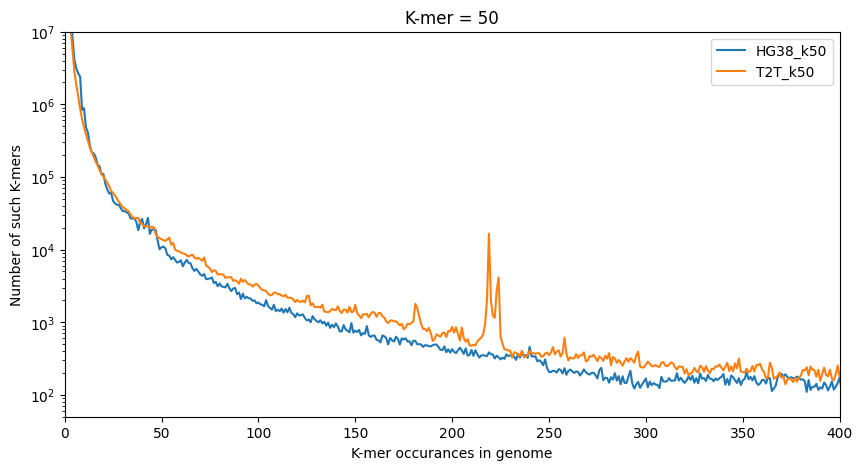

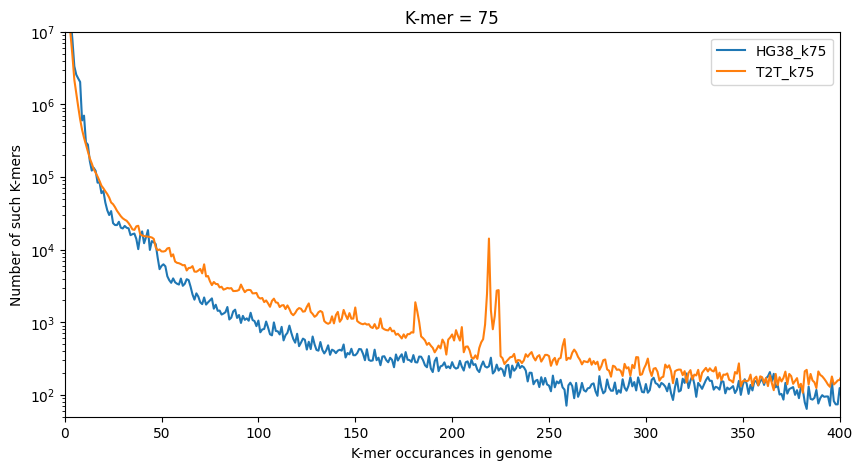

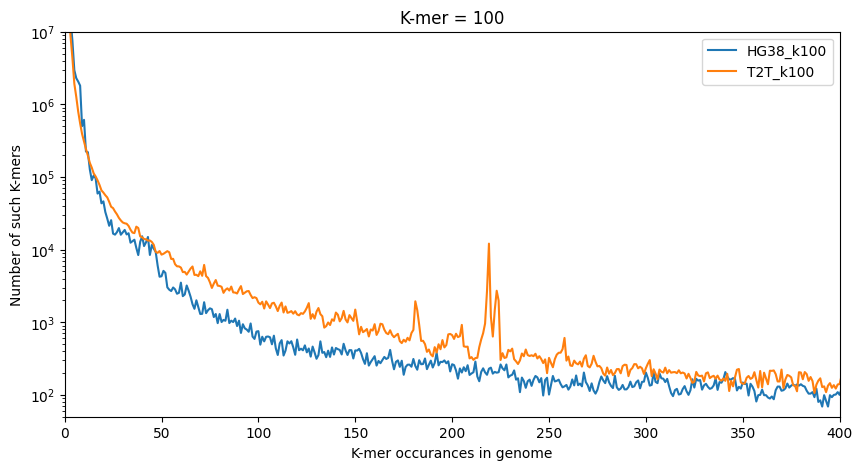

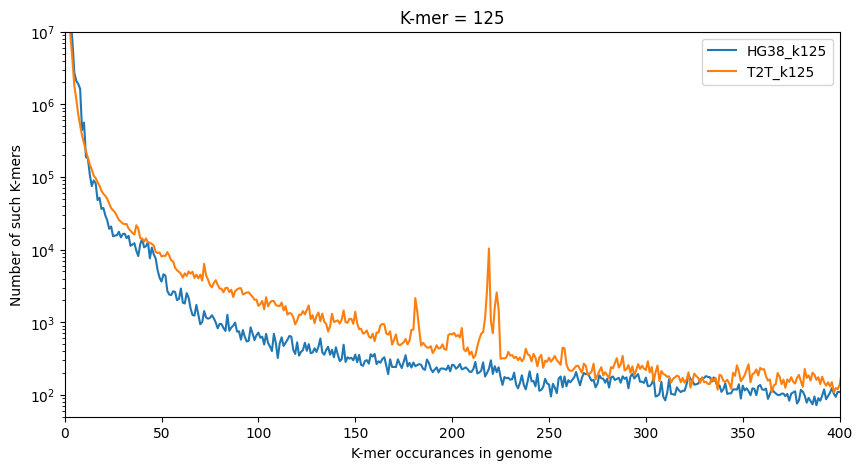

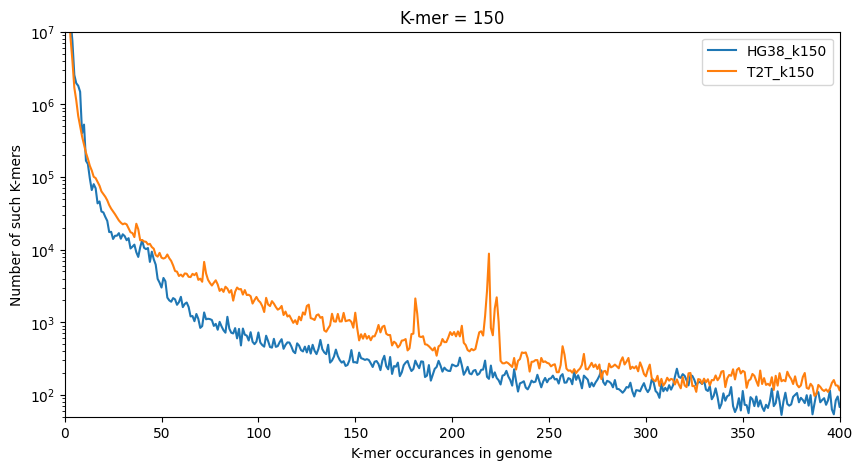

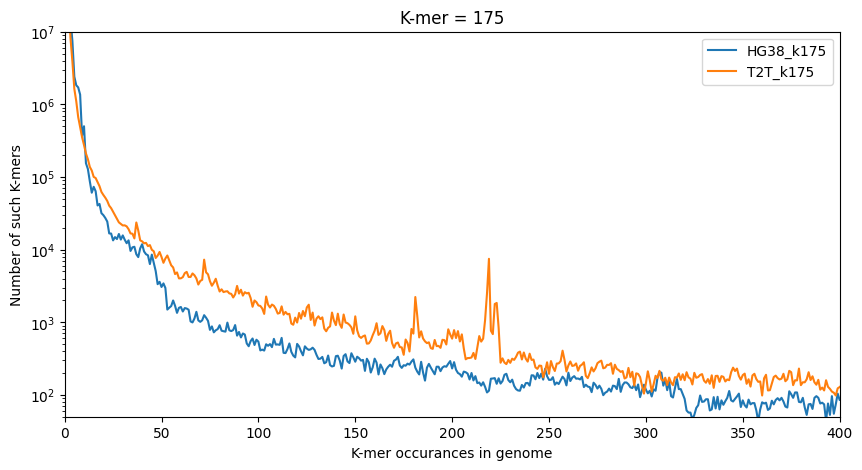

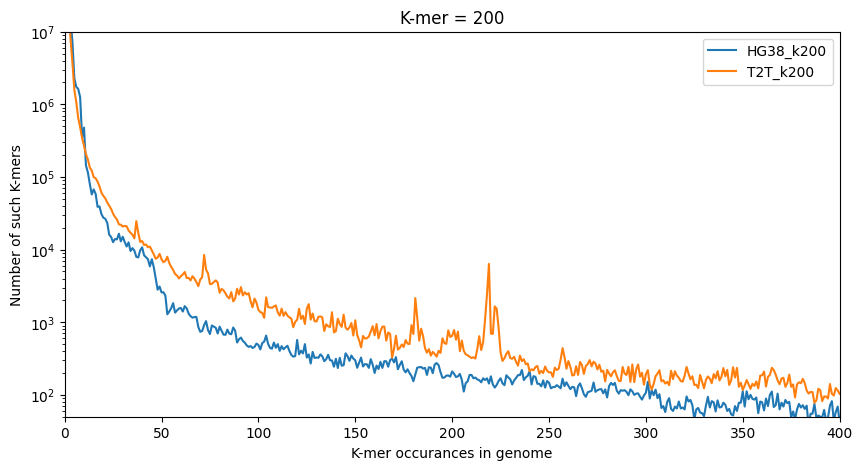

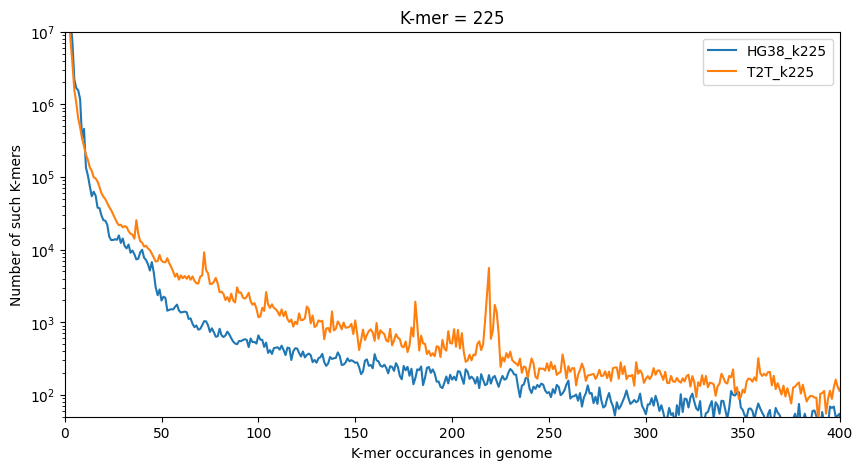

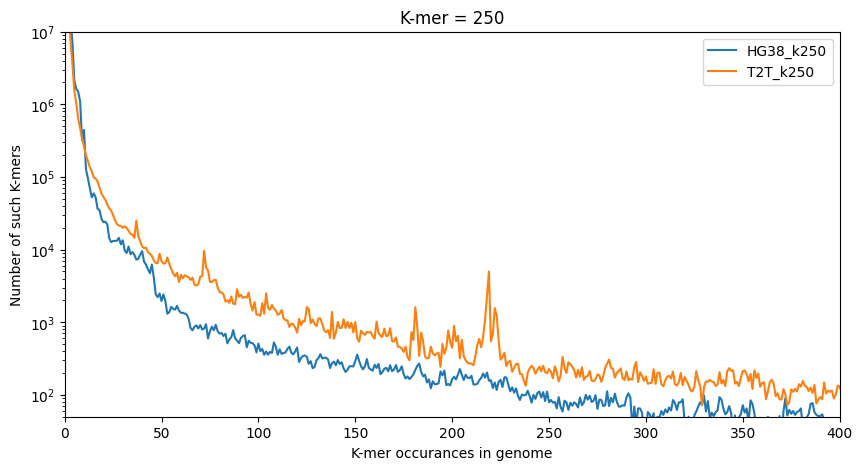

In [52]:
for k in ['25', '50', '75', '100', '125', '150', '175', '200', '225', '250']:
    k_cols = [f'HG38_k{k}', f'T2T_k{k}']
    kmer_hist_all[k_cols].plot(logy=True, figsize=(10, 5))
    plt.xlabel('K-mer occurances in genome')
    plt.ylabel('Number of such K-mers')
    plt.title(f'K-mer = {k}')
    plt.ylim(50, 10**7)
    plt.xlim(0,400)
#     plt.savefig(f'k={k}.png')

## Non-unique k-mers by k

In [54]:
k_range = ['25', '50', '75', '100', '125', '150', '175', '200', '225', '250']

hg38_kmers = [f'HG38_k{k}' for k in k_range]
t2t_kmers = [f'T2T_k{k}' for k in k_range]

In [64]:
hg38_nonunqie = kmer_hist_all[hg38_kmers].sum()
hg38_nonunqie.index = k_range

t2t_nonunqie = kmer_hist_all[t2t_kmers].sum()
t2t_nonunqie.index = k_range

all_nonunqie = pd.concat([hg38_nonunqie, t2t_nonunqie], axis=1)
all_nonunqie.columns = ['HG38', 'T2T']

Text(0.5, 1.0, 'Number of non-unque K-mers depends of K')

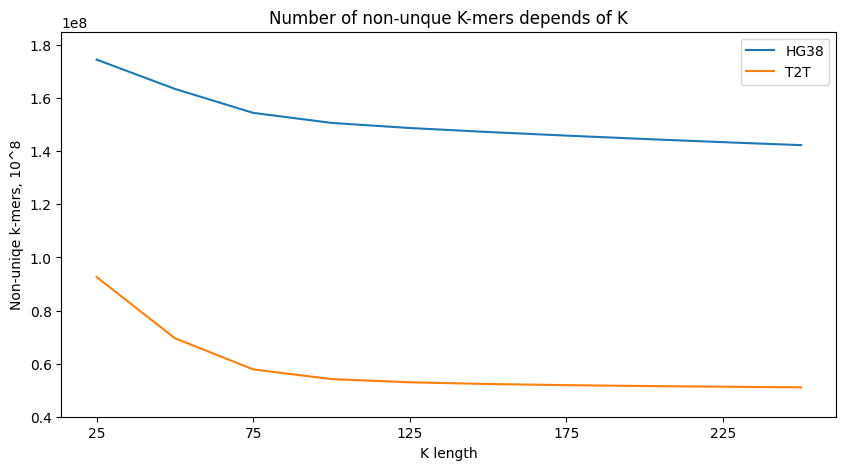

In [95]:
all_nonunqie.plot(figsize=(10, 5))
plt.ylim(0.4*10**8, 1.85*10**8)
plt.xlabel('K length')
plt.ylabel('Non-uniqe k-mers, 10^8')
plt.title('Number of non-unque K-mers depends of K')